# Results of different #agent values

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset=['planner', 'damage', 'num_agents'])
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()

results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,111.642567,0.014756,1698.235133,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,102.518466,0.050433,2588.986829,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,111.670547,0.155782,3886.815997,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,105.414650,0.336331,5026.021360,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,113.455740,0.579542,5678.234596,400.0


In [11]:
planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'TravelingLinePlanner', 'SeparateTravelingPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

for name in planners_names:
    print(f'{name}: {results[results.planner == name].shape[0]}')

planners_results = [results.loc[results['planner'] == name] for name in planners_names]
planners_results[0].head(11)

IterativeAssignmentPlanner: 9
KmeansAssignmentPlanner: 0
StaticLinePlanner: 0
TravelingLinePlanner: 0
SeparateTravelingPlanner: 0


,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,111.642567,0.014756,1698.235133,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,102.518466,0.050433,2588.986829,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,111.670547,0.155782,3886.815997,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,105.414650,0.336331,5026.021360,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,113.455740,0.579542,5678.234596,400.0
5,IterativeAssignmentPlanner,500,10.0,2.0,5.0,108.316061,0.896861,6491.621268,500.0
6,IterativeAssignmentPlanner,600,10.0,2.0,5.0,110.966403,1.285579,7695.457522,600.0
7,IterativeAssignmentPlanner,700,10.0,2.0,5.0,120.589326,1.733006,8464.124765,700.0
8,IterativeAssignmentPlanner,800,10.0,2.0,5.0,109.672459,2.294838,9755.473211,800.0


## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

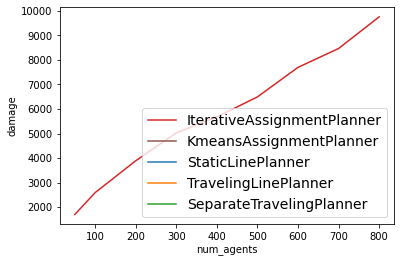

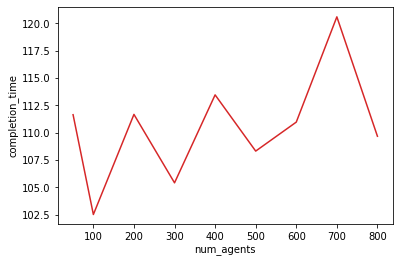

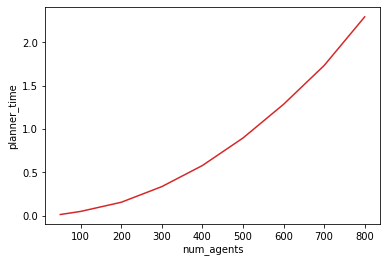

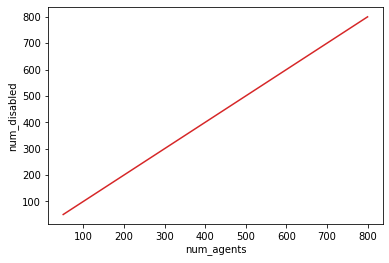

In [12]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 0:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()